In [11]:
import pandas as pd
import numpy as np
import torch
import torchvision.transforms as transforms
import torchvision.models as models
import os
from PIL import Image
import matplotlib.pyplot as plt
try: import kagglehub
except:
    !pip install kagglehub
    import kagglehub

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
NUM_WORKERS = 2
IMAGENET_MEAN = [0.485, 0.456, 0.406]
IMAGENET_STD = [0.229, 0.224, 0.225]

In [12]:
dataset_path_root = kagglehub.dataset_download("sumn2u/garbage-classification-v2")
data_dir = os.path.join(dataset_path_root, "garbage-dataset")

class_dirs = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
class_dirs

['battery',
 'biological',
 'cardboard',
 'clothes',
 'glass',
 'metal',
 'paper',
 'plastic',
 'shoes',
 'trash']

In [21]:
def predict_image(model, image_path, device):
    transform = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=IMAGENET_MEAN,
                           std=IMAGENET_STD)
    ])
    
    image_tensor = Image.open(image_path).convert('RGB')
    image_tensor = transform(image_tensor)

    with torch.no_grad():
        if image_tensor.dim() == 3:
            image_tensor = image_tensor.unsqueeze(0)
        image_tensor = image_tensor.to(device)
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
        probabilities = torch.nn.functional.softmax(outputs, dim=1)
        return predicted.item(), probabilities[0].tolist()

### GoogleNet

In [22]:
model = models.googlenet(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 10)
model.load_state_dict(torch.load("models/best_googlenet_model.pth", map_location=device))
model.to(device)
model.eval()

C:\Users\vishg\AppData\Local\Temp\ipykernel_34396\3353445771.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_googlenet_model.pth",

GoogLeNet(
  (conv1): BasicConv2d(
    (conv): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (conv2): BasicConv2d(
    (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv3): BasicConv2d(
    (conv): Conv2d(64, 192, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
  (inception3a): Inception(
    (branch1): BasicConv2d(
      (conv): Conv2d(192, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track


Testing image from class: battery


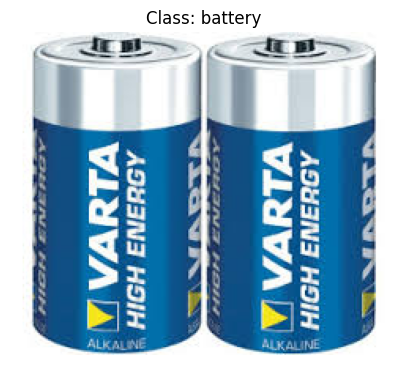

Image: battery_97.jpg
True class: battery
Predicted class: 0 - battery
Class probabilities:             0             1
0     battery  9.999157e-01
1  biological  5.321018e-08
2   cardboard  3.304372e-07
3     clothes  4.055946e-08
4       glass  3.302281e-07
5       metal  8.014398e-05
6       paper  6.725489e-07
7     plastic  8.094575e-07
8       shoes  8.971378e-07
9       trash  9.464862e-07

Testing image from class: biological


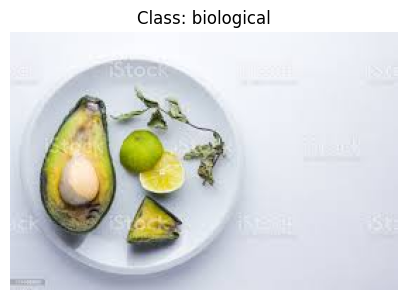

Image: biological_984.jpg
True class: biological
Predicted class: 4 - glass
Class probabilities:             0         1
0     battery  0.008259
1  biological  0.287687
2   cardboard  0.000086
3     clothes  0.000001
4       glass  0.657712
5       metal  0.042263
6       paper  0.000087
7     plastic  0.000992
8       shoes  0.002432
9       trash  0.000481

Testing image from class: cardboard


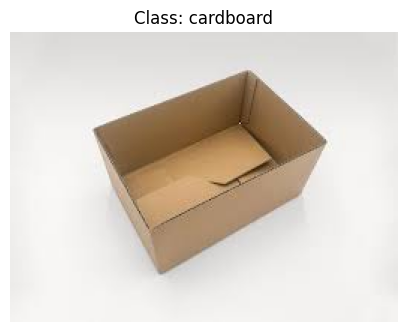

Image: cardboard_993.jpg
True class: cardboard
Predicted class: 2 - cardboard
Class probabilities:             0             1
0     battery  3.893701e-06
1  biological  2.285234e-07
2   cardboard  9.999557e-01
3     clothes  1.558461e-07
4       glass  2.318868e-06
5       metal  1.334430e-05
6       paper  1.949377e-05
7     plastic  2.221795e-06
8       shoes  1.791858e-06
9       trash  9.160474e-07

Testing image from class: clothes


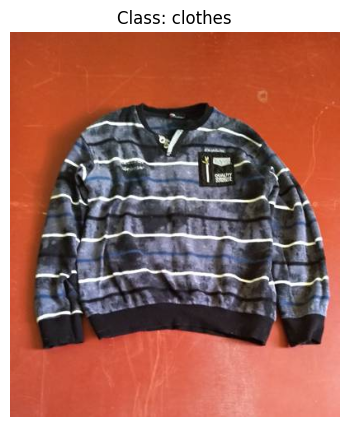

Image: clothes_997.jpg
True class: clothes
Predicted class: 3 - clothes
Class probabilities:             0         1
0     battery  0.000089
1  biological  0.000340
2   cardboard  0.000014
3     clothes  0.934164
4       glass  0.000667
5       metal  0.060608
6       paper  0.000013
7     plastic  0.003171
8       shoes  0.000036
9       trash  0.000899

Testing image from class: glass


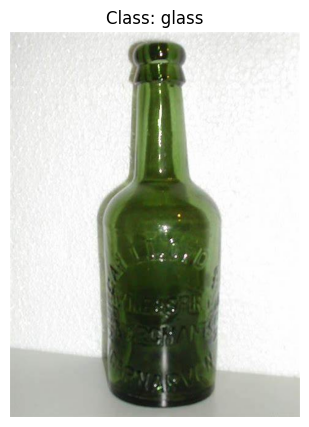

Image: glass_994.jpg
True class: glass
Predicted class: 4 - glass
Class probabilities:             0             1
0     battery  4.526982e-07
1  biological  7.259917e-07
2   cardboard  5.487771e-07
3     clothes  4.834911e-07
4       glass  9.999729e-01
5       metal  1.856148e-05
6       paper  1.282393e-07
7     plastic  3.179107e-06
8       shoes  2.186688e-06
9       trash  7.432038e-07

Testing image from class: metal


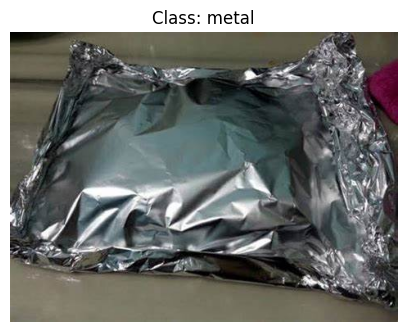

Image: metal_983.jpg
True class: metal
Predicted class: 5 - metal
Class probabilities:             0             1
0     battery  1.087888e-05
1  biological  3.781863e-07
2   cardboard  1.131210e-07
3     clothes  9.840183e-06
4       glass  3.796177e-04
5       metal  9.995397e-01
6       paper  7.251963e-07
7     plastic  4.022216e-05
8       shoes  1.617084e-06
9       trash  1.690490e-05

Testing image from class: paper


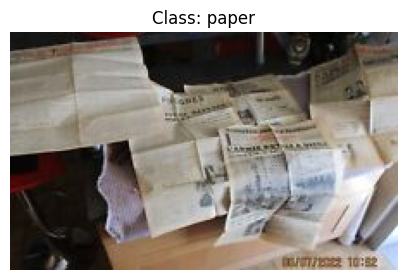

Image: paper_994.jpg
True class: paper
Predicted class: 4 - glass
Class probabilities:             0         1
0     battery  0.004619
1  biological  0.000091
2   cardboard  0.000077
3     clothes  0.000031
4       glass  0.949856
5       metal  0.016027
6       paper  0.023624
7     plastic  0.000518
8       shoes  0.001246
9       trash  0.003911

Testing image from class: plastic


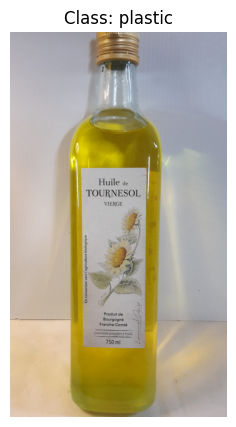

Image: plastic_995.jpg
True class: plastic
Predicted class: 7 - plastic
Class probabilities:             0         1
0     battery  0.000056
1  biological  0.000041
2   cardboard  0.000412
3     clothes  0.000020
4       glass  0.094229
5       metal  0.001351
6       paper  0.000007
7     plastic  0.903846
8       shoes  0.000010
9       trash  0.000028

Testing image from class: shoes


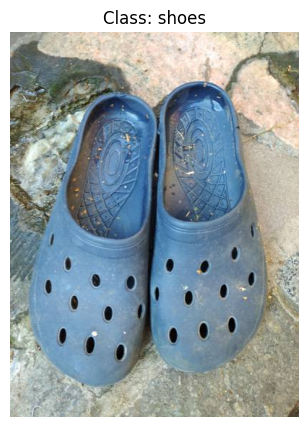

Image: shoes_997.jpg
True class: shoes
Predicted class: 8 - shoes
Class probabilities:             0         1
0     battery  0.035951
1  biological  0.000836
2   cardboard  0.000215
3     clothes  0.021763
4       glass  0.000553
5       metal  0.183713
6       paper  0.000477
7     plastic  0.002623
8       shoes  0.733377
9       trash  0.020492

Testing image from class: trash


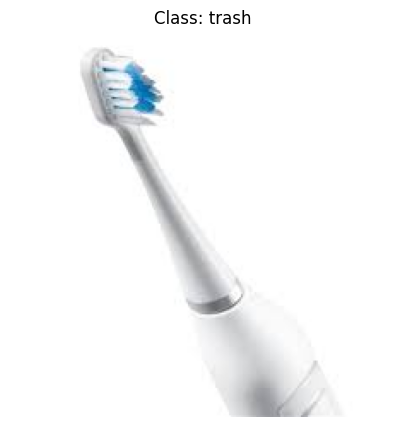

Image: trash_96.jpg
True class: trash
Predicted class: 9 - trash
Class probabilities:             0             1
0     battery  1.256341e-06
1  biological  3.185819e-07
2   cardboard  2.146082e-07
3     clothes  3.206528e-07
4       glass  5.633858e-04
5       metal  2.055987e-06
6       paper  2.841815e-07
7     plastic  1.114533e-05
8       shoes  5.880378e-06
9       trash  9.994152e-01


In [26]:
for class_name in class_dirs:
    print(f"\nTesting image from class: {class_name}")
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)
    
    if image_files:
        # Test the first image from this class
        image_file = image_files[-3]
        image_path = os.path.join(class_path, image_file)
        
        # Display the image
        img = Image.open(image_path)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f"Class: {class_name}")
        plt.axis('off')
        plt.show()
        
        # Make prediction
        prediction, probabilities = predict_image(model, image_path, device)
        
        print(f"Image: {image_file}")
        print(f"True class: {class_name}")
        print(f"Predicted class: {prediction} - {class_dirs[prediction]}")
        print(f"Class probabilities: {pd.DataFrame(zip(class_dirs,probabilities))}")


### ResNet

In [29]:
model = models.resnet50(pretrained=False)
model.fc = torch.nn.Linear(model.fc.in_features, 10)
model.load_state_dict(torch.load("models/best_resnet50_model.pth", map_location=device))
model.to(device)
model.eval()

C:\Users\vishg\AppData\Local\Temp\ipykernel_34396\455496941.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("best_resnet50_model.pth", m

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 


Testing image from class: battery


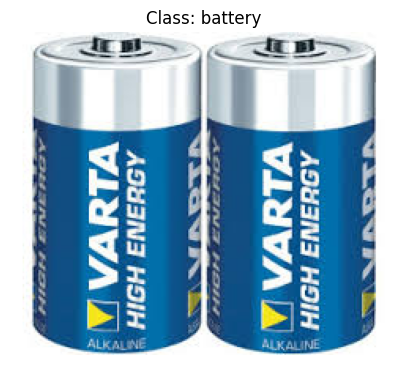

Image: battery_97.jpg
True class: battery
Predicted class: 0 - battery
Class probabilities:             0             1
0     battery  9.099884e-01
1  biological  1.413073e-08
2   cardboard  2.480495e-06
3     clothes  1.558908e-08
4       glass  4.285362e-07
5       metal  8.995561e-02
6       paper  6.569738e-07
7     plastic  4.974436e-05
8       shoes  4.051078e-07
9       trash  2.146583e-06

Testing image from class: biological


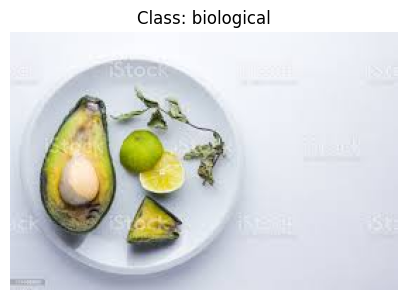

Image: biological_984.jpg
True class: biological
Predicted class: 1 - biological
Class probabilities:             0         1
0     battery  0.001743
1  biological  0.842417
2   cardboard  0.003234
3     clothes  0.000019
4       glass  0.115102
5       metal  0.005033
6       paper  0.000250
7     plastic  0.002933
8       shoes  0.023420
9       trash  0.005849

Testing image from class: cardboard


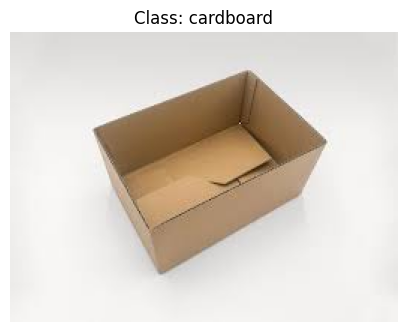

Image: cardboard_993.jpg
True class: cardboard
Predicted class: 2 - cardboard
Class probabilities:             0             1
0     battery  5.433877e-07
1  biological  1.242784e-07
2   cardboard  9.999056e-01
3     clothes  1.511251e-08
4       glass  1.231057e-06
5       metal  2.537178e-07
6       paper  8.980139e-05
7     plastic  4.198070e-07
8       shoes  1.025906e-06
9       trash  1.041635e-06

Testing image from class: clothes


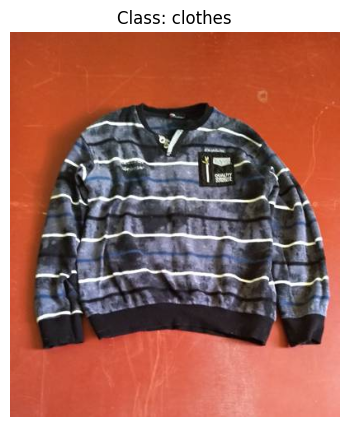

Image: clothes_997.jpg
True class: clothes
Predicted class: 3 - clothes
Class probabilities:             0             1
0     battery  1.307871e-08
1  biological  1.447187e-08
2   cardboard  6.633364e-10
3     clothes  9.999987e-01
4       glass  1.237627e-09
5       metal  1.173882e-06
6       paper  1.050026e-09
7     plastic  9.242430e-08
8       shoes  3.898908e-09
9       trash  1.647209e-09

Testing image from class: glass


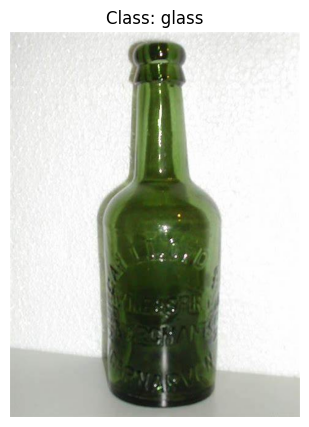

Image: glass_994.jpg
True class: glass
Predicted class: 4 - glass
Class probabilities:             0             1
0     battery  6.277058e-10
1  biological  2.367889e-09
2   cardboard  2.466119e-10
3     clothes  1.431542e-09
4       glass  1.000000e+00
5       metal  1.969695e-09
6       paper  6.955036e-12
7     plastic  2.759424e-08
8       shoes  4.620582e-09
9       trash  4.057098e-09

Testing image from class: metal


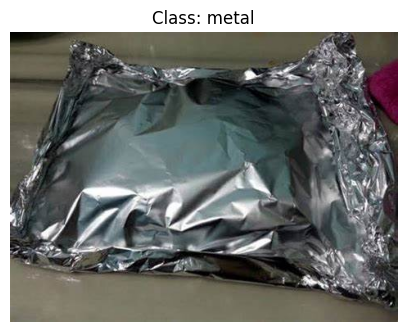

Image: metal_983.jpg
True class: metal
Predicted class: 5 - metal
Class probabilities:             0         1
0     battery  0.000014
1  biological  0.000009
2   cardboard  0.000002
3     clothes  0.008303
4       glass  0.000020
5       metal  0.991095
6       paper  0.000078
7     plastic  0.000204
8       shoes  0.000241
9       trash  0.000035

Testing image from class: paper


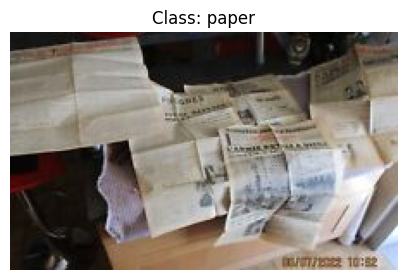

Image: paper_994.jpg
True class: paper
Predicted class: 6 - paper
Class probabilities:             0         1
0     battery  0.000003
1  biological  0.000005
2   cardboard  0.003316
3     clothes  0.000078
4       glass  0.000014
5       metal  0.000004
6       paper  0.996480
7     plastic  0.000042
8       shoes  0.000036
9       trash  0.000023

Testing image from class: plastic


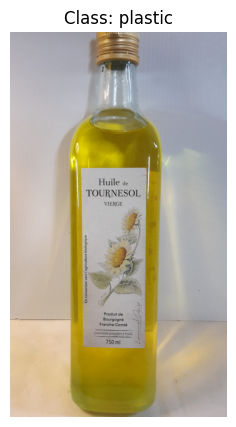

Image: plastic_995.jpg
True class: plastic
Predicted class: 7 - plastic
Class probabilities:             0             1
0     battery  2.492973e-10
1  biological  6.921085e-11
2   cardboard  1.301343e-07
3     clothes  1.022354e-08
4       glass  1.689774e-05
5       metal  7.387290e-09
6       paper  4.111310e-12
7     plastic  9.999830e-01
8       shoes  1.256734e-11
9       trash  2.213003e-10

Testing image from class: shoes


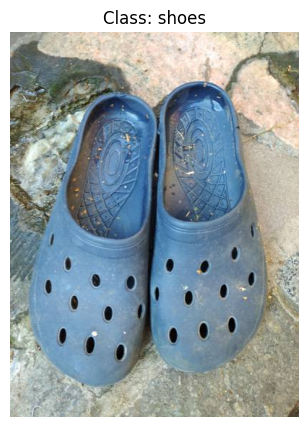

Image: shoes_997.jpg
True class: shoes
Predicted class: 8 - shoes
Class probabilities:             0             1
0     battery  6.916646e-06
1  biological  1.216861e-05
2   cardboard  2.493005e-08
3     clothes  3.365736e-03
4       glass  2.530817e-07
5       metal  4.427498e-06
6       paper  1.014758e-06
7     plastic  3.587248e-06
8       shoes  9.966019e-01
9       trash  3.892673e-06

Testing image from class: trash


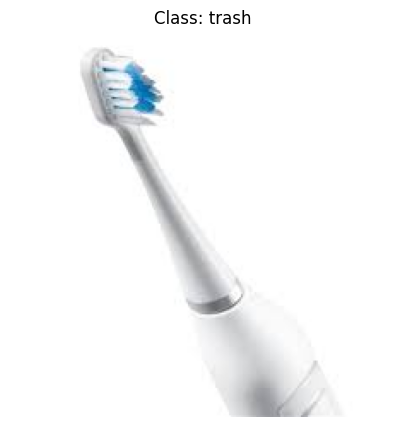

Image: trash_96.jpg
True class: trash
Predicted class: 9 - trash
Class probabilities:             0             1
0     battery  2.261091e-06
1  biological  5.882823e-06
2   cardboard  9.395543e-06
3     clothes  1.856136e-06
4       glass  3.189361e-06
5       metal  1.309044e-07
6       paper  9.458638e-06
7     plastic  8.059836e-06
8       shoes  2.236586e-05
9       trash  9.999374e-01


In [30]:
for class_name in class_dirs:
    print(f"\nTesting image from class: {class_name}")
    class_path = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_path)
    
    if image_files:
        # Test the first image from this class
        image_file = image_files[-3]
        image_path = os.path.join(class_path, image_file)
        
        # Display the image
        img = Image.open(image_path)
        plt.figure(figsize=(5, 5))
        plt.imshow(img)
        plt.title(f"Class: {class_name}")
        plt.axis('off')
        plt.show()
        
        # Make prediction
        prediction, probabilities = predict_image(model, image_path, device)
        
        print(f"Image: {image_file}")
        print(f"True class: {class_name}")
        print(f"Predicted class: {prediction} - {class_dirs[prediction]}")
        print(f"Class probabilities: {pd.DataFrame(zip(class_dirs,probabilities))}")
